**
In this notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast et**

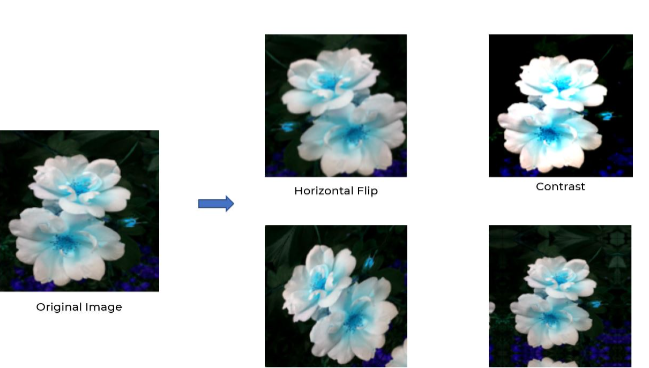c

In [2]:

import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [4]:
data_dir

'.\\datasets\\flower_photos'

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [6]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)


3670


In [8]:
roses = list(data_dir.glob('roses/*'))
roses[:5]


[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

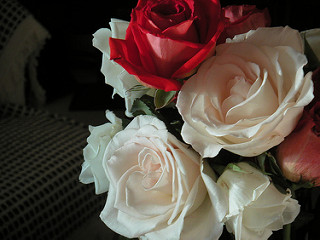

In [9]:
PIL.Image.open(str(roses[1]))

In [10]:

#Read flowers images from disk into numpy array using opencv


flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [12]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [13]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [14]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [15]:
img.shape

(240, 179, 3)

In [16]:

cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [17]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [18]:
X = np.array(X)
y = np.array(y)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [20]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [21]:

num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10) 

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.2813 - loss: 1.8196
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.5128 - loss: 1.1515
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.6253 - loss: 0.9386
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.6895 - loss: 0.8118
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.7839 - loss: 0.6140
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.8665 - loss: 0.3981
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 0.9215 - loss: 0.2540
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.9568 - loss: 0.1609
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.9693 - loss: 0.1094
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.9808 - loss: 0.0852


In [22]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6341 - loss: 1.6594


[1.6963841915130615, 0.6187363862991333]

In [23]:

predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


array([[  2.7759907 ,  15.494745  ,   6.7580786 , -15.08248   ,
         -7.0631266 ],
       [  8.681775  ,  -1.5403204 ,  -5.7483497 ,   0.78849465,
          8.278938  ],
       [  0.5079429 ,   1.0078392 ,   9.630078  ,  -3.659394  ,
         -2.1326158 ],
       ...,
       [ -2.510935  ,  -3.5716004 ,  -8.920659  ,   6.99114   ,
          7.2936726 ],
       [  1.0722702 ,   3.5587325 ,   4.288311  ,  -0.85868376,
         -4.6122465 ],
       [  2.2980251 ,  -7.823575  ,   1.7567853 ,   6.427225  ,
          8.478046  ]], dtype=float32)

**Improve Test Accuracy Using Data Augmentation**


In [25]:
import tensorflow as tf
from tensorflow.keras import layers

img_height = 180  # Replace with your image height
img_width = 180   #Replace with your image width
data_augmentation = tf.keras.Sequential(
    [
        layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)


D:\Installation_path\ANACONDA\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)   

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.3438 - loss: 1.5575
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.5364 - loss: 1.1238
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.6010 - loss: 0.9737
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.6603 - loss: 0.8578
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - accuracy: 0.6693 - loss: 0.8405
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - accuracy: 0.6925 - loss: 0.7901
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.7026 - loss: 0.7629
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - accuracy: 0.7256 - loss: 0.7263
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - accuracy: 0.7408 - loss: 0.6676
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.7512 - loss: 0.6370


In [47]:

model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6795 - loss: 0.8177


[0.8249272108078003, 0.6906318068504333]